In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Irrigation and yiels test 

In [3]:
statistic_yield = pd.read_csv('../../data/cnera_data/yield.csv')
# statistic_yield.head()
harvest_date_yield_biomass = pd.read_csv('../../data/cnera_data/finally_yield_biomass.csv')
harvest_date_yield_biomass_mean = harvest_date_yield_biomass.groupby(['生态站代码','样地代码','年'])[['地上部总干重(g/㎡)','产量(g/㎡)']].mean().reset_index()
harvest_date_yield_biomass_mean['收获测产(kg/ha)'] = harvest_date_yield_biomass_mean['产量(g/㎡)'] *10 # convert unit to kg/ha
harvest_date_yield_biomass_mean.drop(columns=['产量(g/㎡)'], inplace=True)
harvest_date_yield_biomass_mean.head()


,生态站代码,样地代码,年,地上部总干重(g/㎡),收获测产(kg/ha)
0,AKA,AKAFZ01AB0_01,2007,1419.006667,5046.366667
1,AKA,AKAFZ01AB0_01,2008,975.735000,5073.250000
2,AKA,AKAFZ02AB0_01,2009,1229.975000,4745.500000
3,AKA,AKAFZ02AB0_01,2010,2076.045000,2236.150000
4,AKA,AKAFZ02AB0_01,2011,1276.442500,5470.625000


In [4]:
ensemble_yield_biomass = pd.merge(statistic_yield[['生态站代码','样地代码','年','单产(kg/h㎡)']], harvest_date_yield_biomass_mean, on=['生态站代码','样地代码','年'], how='outer')
ensemble_yield_biomass.head()

,生态站代码,样地代码,年,单产(kg/h㎡),地上部总干重(g/㎡),收获测产(kg/ha)
0,AKA,AKAFZ01AB0_01,2007,5046.40,1419.006667,5046.366667
1,AKA,AKAFZ01AB0_01,2008,5073.30,975.735000,5073.250000
2,AKA,AKAFZ02AB0_01,2009,4745.50,1229.975000,4745.500000
3,AKA,AKAFZ02AB0_01,2010,2236.13,2076.045000,2236.150000
4,AKA,AKAFZ02AB0_01,2011,5471.40,1276.442500,5470.625000


In [11]:
irrigation_schedule = pd.read_csv('../../data/cnera_data/irrigation_schedules.csv')
irrigation_schedule.head()
# irrigation_schedule.groupby(['生态站代码','样地代码','年'])['灌溉方式'].unique()
irr_annual_sum = irrigation_schedule.groupby(['生态站代码','样地代码','年'])['灌溉量(mm)',].sum().reset_index()
# irr_annual_sum = pd.merge(irr_annual_sum, irrigation_schedule[['生态站代码','样地代码','年','灌溉方式']], on=['生态站代码','样地代码','年'],how='inner')
irr_annual_sum.head()

,生态站代码,样地代码,年,灌溉量(mm)
0,AKA,AKAFZ01AB0_01,2007,850.0
1,AKA,AKAFZ01AB0_01,2008,1000.0
2,AKA,AKAFZ02AB0_01,2009,800.0
3,AKA,AKAFZ02AB0_01,2010,1395.0
4,AKA,AKAFZ02AB0_01,2011,2473.7


In [17]:
yield_biomass_irr_relation = pd.merge(ensemble_yield_biomass, irr_annual_sum, on=['生态站代码','样地代码','年'], how='outer')
yield_biomass_irr_relation.head()

,生态站代码,样地代码,年,单产(kg/h㎡),地上部总干重(g/㎡),收获测产(kg/ha),灌溉量(mm)
0,AKA,AKAFZ01AB0_01,2007,5046.40,1419.006667,5046.366667,850.0
1,AKA,AKAFZ01AB0_01,2008,5073.30,975.735000,5073.250000,1000.0
2,AKA,AKAFZ02AB0_01,2009,4745.50,1229.975000,4745.500000,800.0
3,AKA,AKAFZ02AB0_01,2010,2236.13,2076.045000,2236.150000,1395.0
4,AKA,AKAFZ02AB0_01,2011,5471.40,1276.442500,5470.625000,2473.7


## save yield results

In [18]:
yield_biomass_irr_relation['单产(t/ha)'] = yield_biomass_irr_relation['单产(kg/h㎡)'] /1000 #convert unit to t/ha 
yield_biomass_irr_relation['收获测产(t/ha)'] = yield_biomass_irr_relation['收获测产(kg/ha)'] /1000
yield_biomass_irr_relation['地上部总干重(kg/ha)'] = yield_biomass_irr_relation['地上部总干重(g/㎡)'] *10 #convert unit to kg/ha

yield_biomass_output = yield_biomass_irr_relation.drop(['地上部总干重(g/㎡)', '单产(kg/h㎡)','收获测产(kg/ha)'], axis=1)
yield_biomass_output.columns = ['ID','samples','years','irrigation(mm)','yield_sta(t/ha)','yield_hav(t/ha)','biomass(kg/ha)']
yield_biomass_output.head()
yield_biomass_output.to_csv('../../data/calibration/obs_finally_yield.csv', index=False)

### Analyse yield statistic error

In [29]:
yield_biomass_output['yield_error(kg/ha)'] = yield_biomass_output['yield_sta(kg/ha)'] - yield_biomass_output['yield_hav(kg/ha)']
yield_biomass_output.head()

,ID,samples,years,irrigation(mm),yield_sta(kg/ha),yield_hav(kg/ha),biomass(kg/ha),yield_error(kg/ha)
0,AKA,AKAFZ01AB0_01,2007,850.0,5.04640,5.046367,14190.066667,0.000033
1,AKA,AKAFZ01AB0_01,2008,1000.0,5.07330,5.073250,9757.350000,0.000050
2,AKA,AKAFZ02AB0_01,2009,800.0,4.74550,4.745500,12299.750000,0.000000
3,AKA,AKAFZ02AB0_01,2010,1395.0,2.23613,2.236150,20760.450000,-0.000020
4,AKA,AKAFZ02AB0_01,2011,2473.7,5.47140,5.470625,12764.425000,0.000775


In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import os
# Set the font to Songti
font_songti = FontProperties(fname=r'C:\Windows\Fonts\simsun.ttc')  # Update the path accordingly

def plot_observation_annual_change(data, observation_name):
    '''
    plot observation yield,biomass and irrigation annual change
    
    '''
    
    # Create subplots
    fig, axes = plt.subplots(3, 1, figsize=(9, 10))
    
    # Plot each group
    for i, (name, group) in enumerate(data.groupby('ID')):
        sns.lineplot(data=group, x='years', y=observation_name, hue='samples', ax=axes[i])
        axes[i].set_title(f'{name}', fontproperties=font_songti, loc='left')
        # Set font for x-axis and y-axis labels
        axes[i].set_xlabel('years', fontproperties=font_songti)
        axes[i].set_ylabel(observation_name, fontproperties=font_songti)
    
    plt.legend(prop=font_songti)
    
    # Ensure the directory exists
    output_directory = '../../figs/observation_data_test/'
    os.makedirs(output_directory, exist_ok=True)

    filename = observation_name.split('(')[0]  # Fix the filename creation
    # Save the plot as a PNG file
    plt.savefig(os.path.join(output_directory, filename + 'annual_change.png'))

In [ ]:

# yield_irr_relation.columns
for obs_name in yield_biomass_output.columns[3:]:
    print(obs_name)
    plot_observation_annual_change(yield_biomass_output, obs_name)

## Phenology 


In [50]:
development_stages = pd.read_csv('../../data/cnera_data/development_stages.csv')
development_stages.head()

,生态站代码,年,样地代码,样地名称,样地类别,作物品种,播种期(月/日/年),出苗期(月/日/年),现蕾期(月/日/年),开花期(月/日/年),打顶期(月/日/年),吐絮期(月/日/年),最终收获期(月/日/年),备注
0,AKA,2007,AKAFZ01AB0_01,阿克苏绿洲农田辅助观测场土壤生物采样地 ...,辅助观测场,中棉49,04/26/2007,05/07/2007,06/18/2007,07/19/2007,07/23/2007,09/05/2007,11/05/2007,NaN
1,AKA,2008,AKAFZ01AB0_01,阿克苏绿洲农田辅助观测场土壤生物采样地 ...,辅助观测场,中棉49,04/26/2008,05/07/2008,06/08/2008,06/28/2008,07/14/2008,08/25/2008,11/01/2008,NaN
2,AKA,2009,AKAFZ02AB0_01,阿克苏绿洲农田辅助观测场土壤生物采样地 ...,辅助观测场,拓农1号,04/23/2009,05/01/2009,06/09/2009,07/07/2009,07/18/2009,08/23/2009,11/01/2009,NaN
3,AKA,2010,AKAFZ02AB0_01,阿克苏绿洲农田辅助观测场土壤生物采样地 ...,辅助观测场,拓农1号,04/24/2010,05/02/2010,06/10/2010,07/03/2010,07/21/2010,08/25/2010,12/04/2010,NaN
4,AKA,2011,AKAFZ02AB0_01,阿克苏绿洲农田辅助观测场土壤生物采样地 ...,辅助观测场,塔河36,05/02/2011,05/08/2011,06/12/2011,06/28/2011,07/23/2011,08/20/2011,12/01/2011,NaN


## LAI and Biomass

In [11]:
import pandas as pd
import math
import os
import seaborn as sns
import matplotlib.pyplot as plt

def load_data():
    obs_lai_biomass = pd.read_csv('../../data/cnera_data/observation_lai_biomass.csv')
    development_stages = pd.read_csv('../../data/cnera_data/development_stages.csv')
    return obs_lai_biomass, development_stages

def calculate_canopy_cover_series(lai_series):
    '''
    calculating canopy from lai
    '''
    cc_series = (1 - pd.Series([math.exp(-lai/1.3) for lai in lai_series], index=lai_series.index)) / (1 + pd.Series([math.exp(-lai/1.3) for lai in lai_series], index=lai_series.index))
    return cc_series

def preprocess_data(obs_lai_biomass, development_stages):
    obs_lai_biomass['date'] = pd.to_datetime(obs_lai_biomass['年'].astype(str) + '-' + obs_lai_biomass['月'].astype(str) + '-' + obs_lai_biomass['日'].astype(str), format='%Y-%m-%d')
    obs_lai_biomass_dap = obs_lai_biomass.merge(development_stages[['生态站代码','样地代码','年','播种期(月/日/年)']], on=['生态站代码','样地代码','年'], how='inner')
    obs_lai_biomass_dap['播种期(月/日/年)'] = obs_lai_biomass_dap['播种期(月/日/年)'].str.strip()
    obs_lai_biomass_dap['播种期(月/日/年)'] = pd.to_datetime(obs_lai_biomass_dap['播种期(月/日/年)'], format='%m/%d/%Y')
    obs_lai_biomass_dap['dap'] = (obs_lai_biomass_dap.date - obs_lai_biomass_dap['播种期(月/日/年)']).dt.days
    obs_lai_biom_dap = obs_lai_biomass_dap[['生态站代码','样地代码','年','dap','叶面积指数','地上部总干重(g/㎡)']]
    obs_lai_biom_dap.columns = ['ID','samples','years','dap','lai','biomass(g/m2)']
    return obs_lai_biom_dap

def calculate_additional_metrics(obs_lai_biom_dap):
    obs_lai_biom_dap['cc'] = calculate_canopy_cover_series(obs_lai_biom_dap.lai)
    obs_lai_biom_dap['biomass(kg/ha)'] = obs_lai_biom_dap['biomass(g/m2)'] * 10  # 1 g/m² = 10 kg/ha
    obs_lai_biom_dap_results = obs_lai_biom_dap[['ID','samples','years','dap','cc','biomass(kg/ha)']]
    return obs_lai_biom_dap_results

def plot_observation_cc_biomass(id, group):
    for observation_name in group.columns[-2:]:
        plt.figure(figsize=(12, 8))
        sns.set_theme(style="ticks")  # Updated from sns.set to sns.set_theme
        g = sns.FacetGrid(data=group, col="years", hue="samples", col_wrap=4, aspect=1.5)
        g.map(sns.scatterplot, "dap", observation_name, markers="d")
        g.set(xticks=[0, 50, 100, 150, 200])
        g.set_axis_labels("Dap", observation_name)
        plt.legend()
        outputfile = '../../figs/observation_data_test/'
        os.makedirs(outputfile, exist_ok=True)
        plt.savefig(os.path.join(outputfile, id + '_' + observation_name + '_canopy_cover.png'))

def save_results(obs_lai_biom_dap_results):
    obs_lai_biom_dap_results['samples'] = obs_lai_biom_dap_results['samples'].str.strip()
    obs_lai_biom_dap_results.to_csv('../../data/calibration/obs_lai_biomass_dap_results.csv', index=False)


obs_lai_biomass, development_stages = load_data()
obs_lai_biom_dap = preprocess_data(obs_lai_biomass, development_stages)
obs_lai_biom_dap_results = calculate_additional_metrics(obs_lai_biom_dap)
obs_lai_biom_dap_results.head()
save_results(obs_lai_biom_dap_results)

# Plot observation canopy cover and biomass for each unique ID
for unique_id, group in obs_lai_biom_dap_results.groupby('ID'):
    plot_observation_cc_biomass(unique_id, group)


C:\Users\17702\AppData\Local\Temp\ipykernel_22524\4078674892.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obs_lai_biom_dap_results['samples'] = obs_lai_biom_dap_results['samples'].str.strip()


## soil water

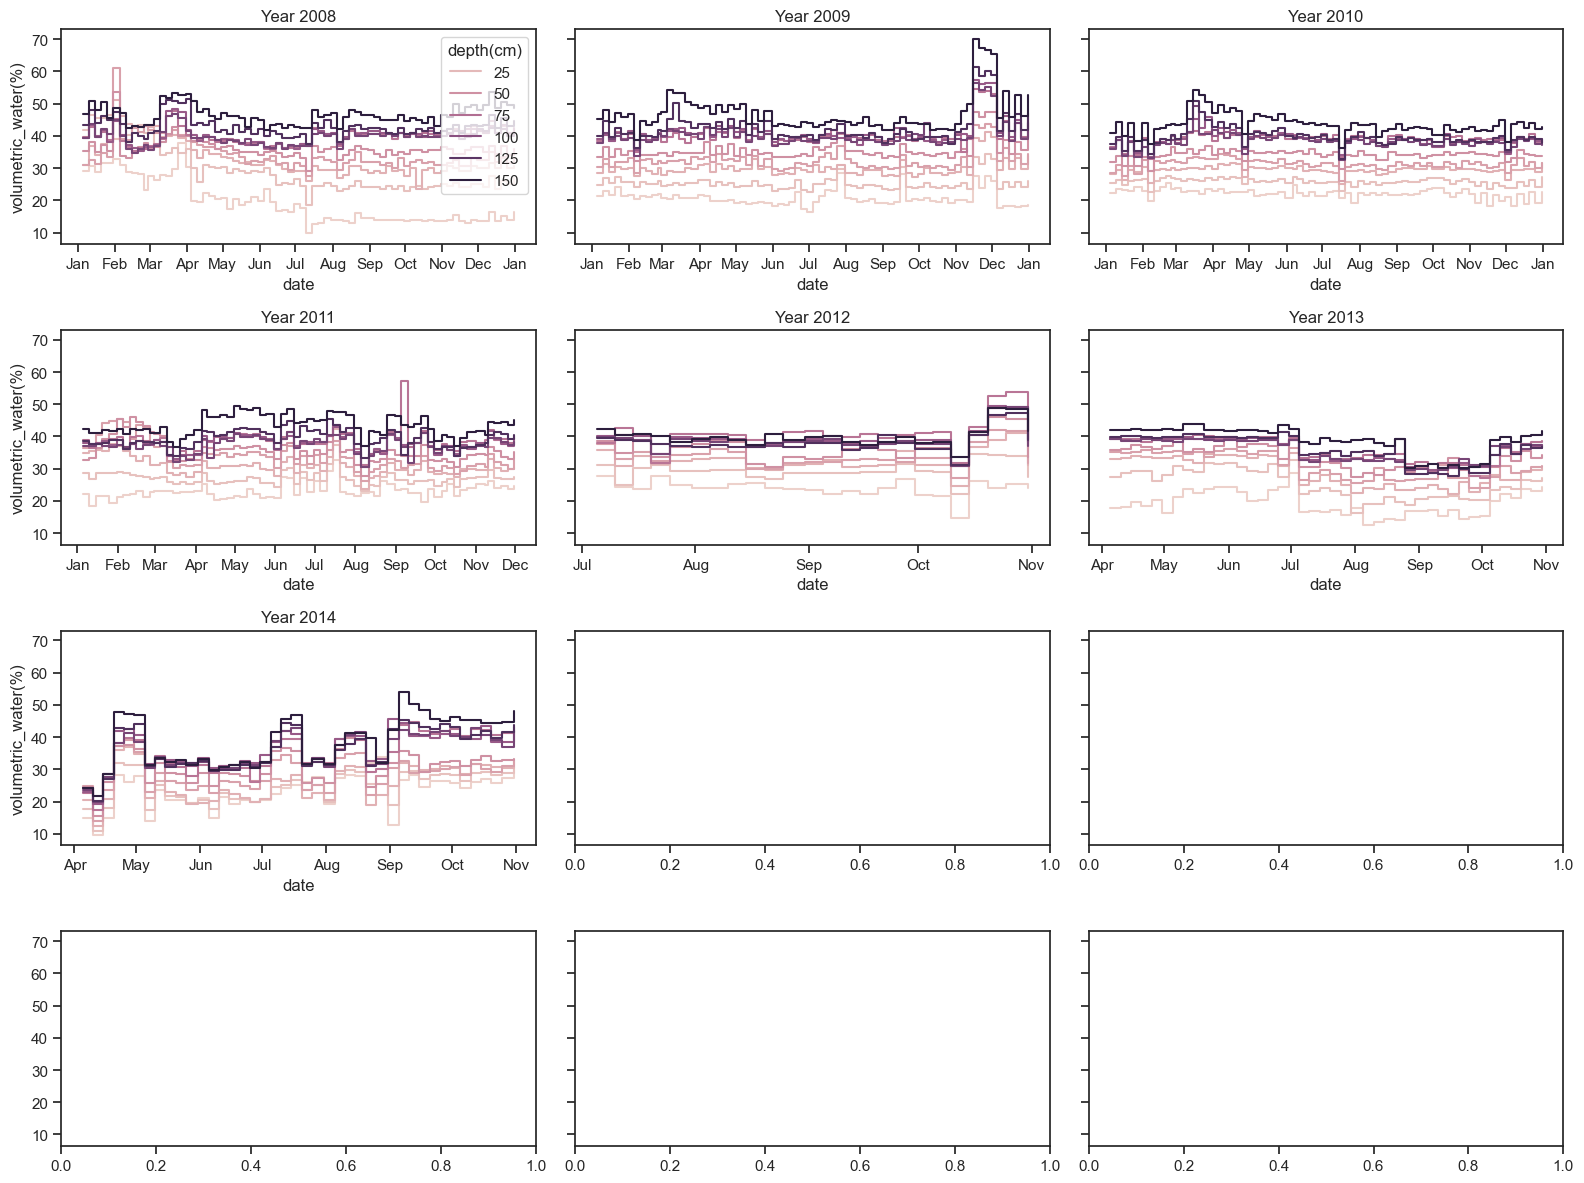

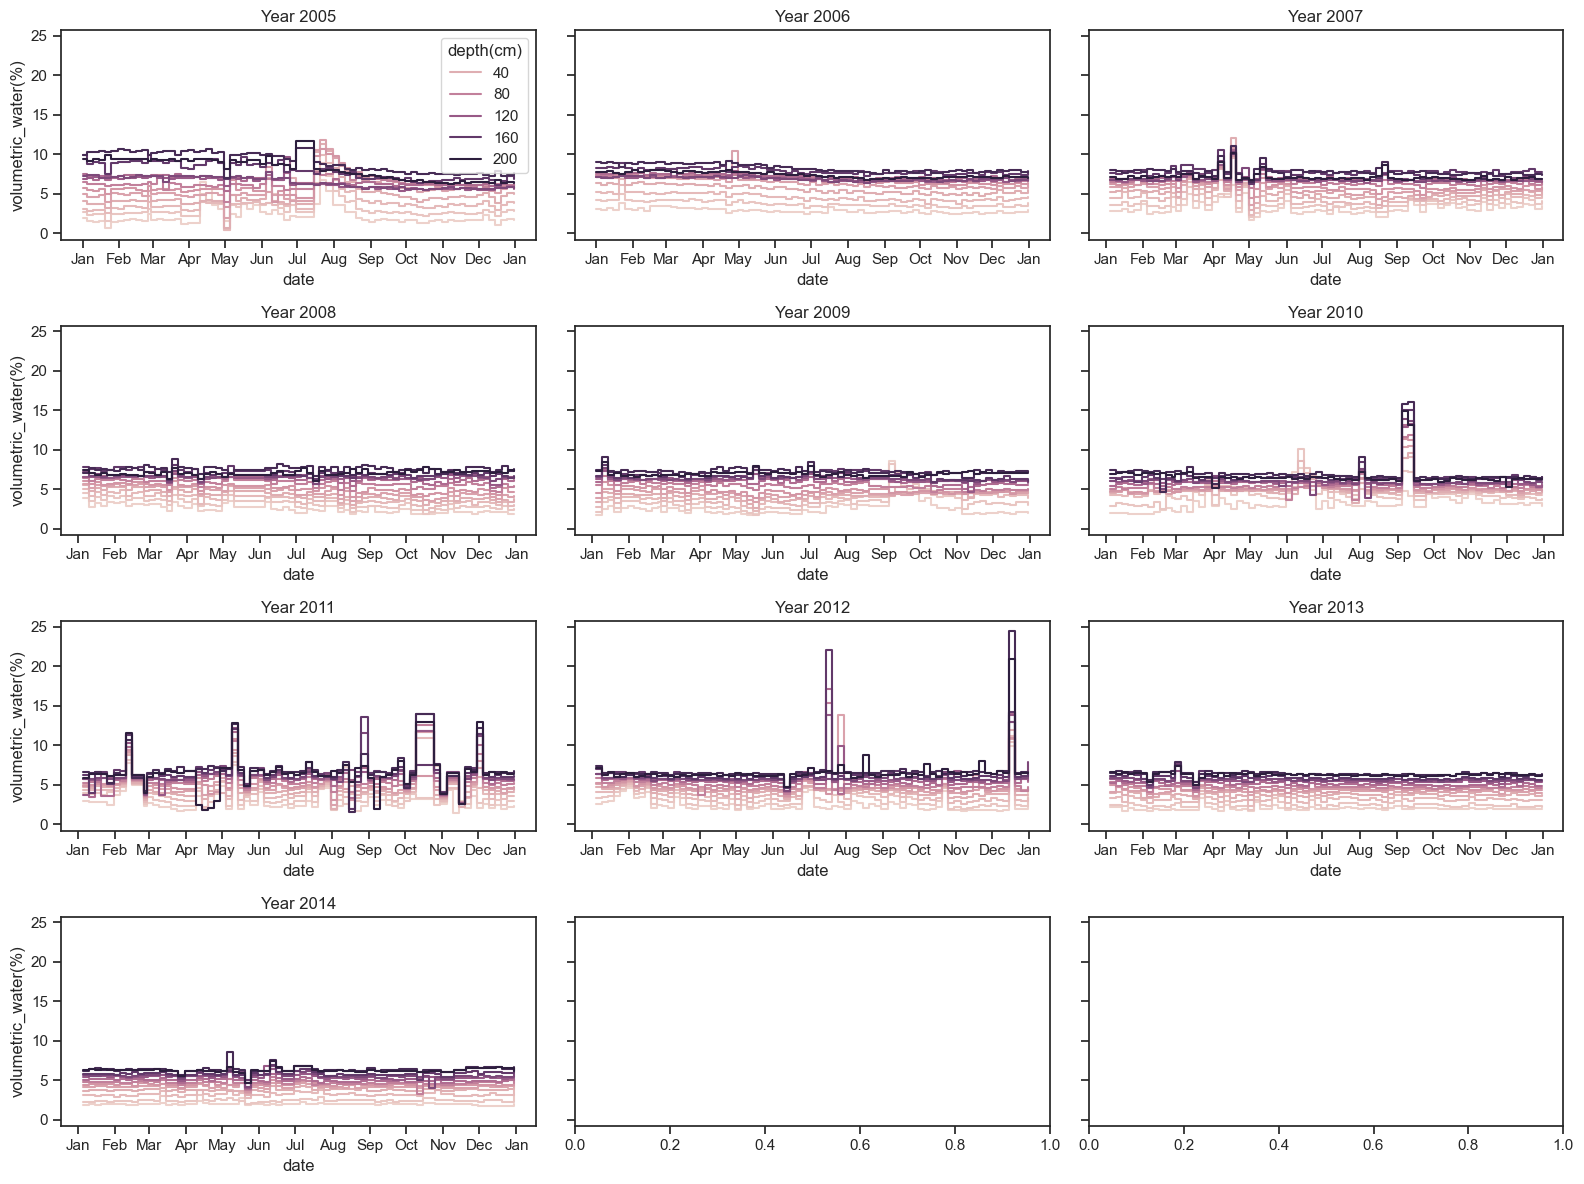

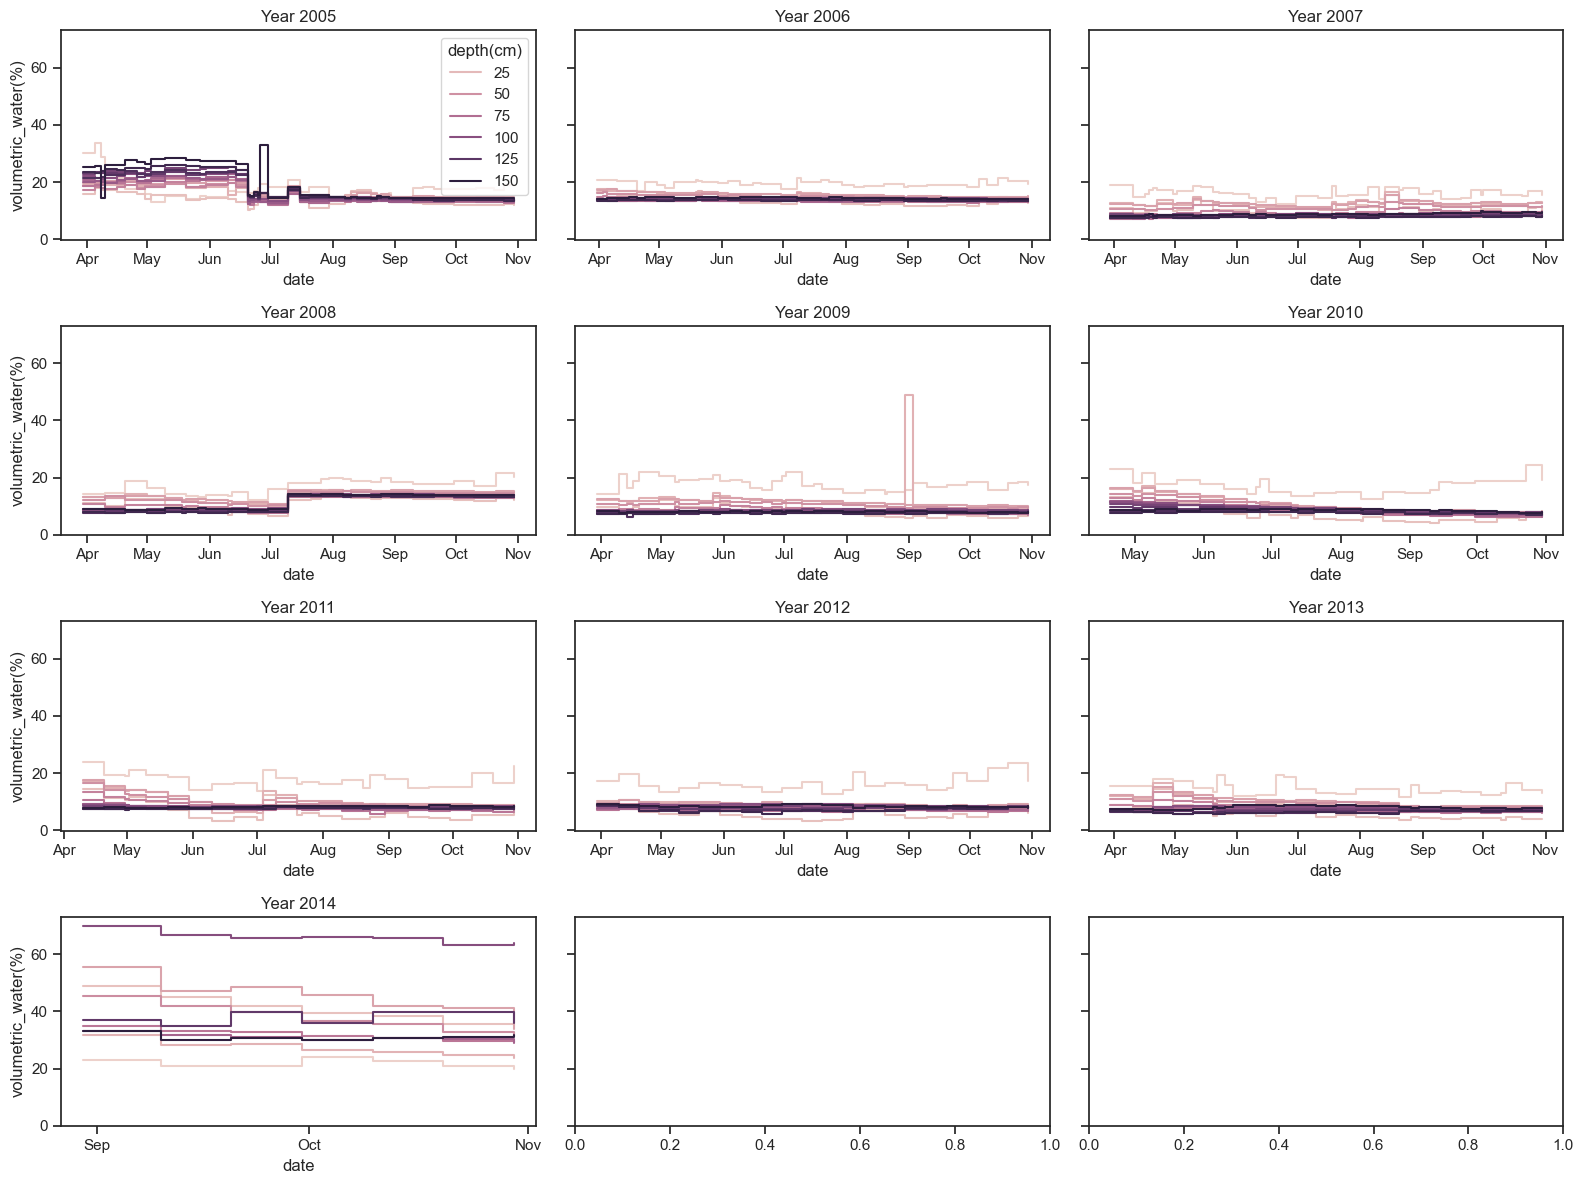

In [15]:
import pandas as pd
from matplotlib.dates import MonthLocator, DateFormatter

def load_soil_water_data(filepath):
    soil_water = pd.read_csv(filepath)
    soil_water['date'] = pd.to_datetime(soil_water['年'].astype(str) + '-' + soil_water['月'].astype(str) + '-' + soil_water['日'].astype(str), format='%Y-%m-%d')
    soil_water = soil_water[['台站代码','date','样地代码','土地利用类型','观测层次（cm）','体积含水量（%）']]
    soil_water.columns = ['ID','date','samples','landuse','depth(cm)','volumetric_water(%)']
    return soil_water

def calculate_soil_water_mean(soil_water):
    soil_water_mean = soil_water.groupby(['ID','date','depth(cm)'])['volumetric_water(%)'].mean().reset_index()
    return soil_water_mean

def save_soil_water_data(soil_water_mean, output_filepath):
    soil_water_mean.to_csv(output_filepath, index=False)

def plot_annual_soil_water(id, data):
    data['years'] = data['date'].dt.year

    fig, axes = plt.subplots(4, 3, figsize=(16, 12), sharex=False, sharey=True)
    
    for i, (year, group) in enumerate(data.groupby('years')):
        row, col = divmod(i, 3)
        ax = axes[row, col]
        
        sns.lineplot(data=group, x='date', y='volumetric_water(%)', hue='depth(cm)', drawstyle='steps-post', ax=ax)
        
        ax.set_title(f'Year {year}')
        ax.xaxis.set_major_locator(MonthLocator())
        ax.xaxis.set_major_formatter(DateFormatter('%b'))
        
        if i == 0:
            ax.legend(title='depth(cm)')
        else:
            ax.get_legend().remove()
            
    plt.tight_layout()
    outputfile = '../../figs/observation_data_test/'
    os.makedirs(outputfile, exist_ok=True)
    plt.savefig(os.path.join(outputfile, id + '_' + 'volumetric_water.png'))


# Load soil water data
soil_water = load_soil_water_data('../../data/cnera_data/土壤含水量.csv')
soil_water.head()

# Calculate mean soil water content
soil_water_mean = calculate_soil_water_mean(soil_water)

# Save the results
save_soil_water_data(soil_water_mean, '../../data/calibration/soil_water.csv')

# Plot observation soil water for each unique ID
for unique_id, group in soil_water_mean.groupby('ID'):
    plot_annual_soil_water(unique_id, group)



## Correlation analysis for weather and yield
分析气象数据,灌溉量对产量,生物量的影响

In [78]:
weather = pd.read_csv('../../data/calibration/weather.csv')
weather.head()

,ID,day,month,years,tmin(C),tmax(C),prcp(mm),et0(mm)
0,CLD,1,1,2000,3.0,12.9,0.0,3.364761
1,CLD,2,1,2000,-5.3,14.6,0.0,2.594608
2,CLD,3,1,2000,-1.0,20.0,0.0,3.516756
3,CLD,4,1,2000,-1.9,15.4,0.0,2.942528
4,CLD,5,1,2000,-8.2,9.9,0.0,2.471342


In [80]:
annual_pre_et0 = weather.groupby(['ID','years'])[['prcp(mm)','et0(mm)']].sum().reset_index()
annual_temp = weather.groupby(['ID','years'])[['tmin(C)','tmax(C)']].mean().reset_index()
tempt = pd.merge(annual_pre_et0, annual_temp, on=['ID','years'], how='inner')
tempt.head()

,ID,years,prcp(mm),et0(mm),tmin(C),tmax(C)
0,AKA,2000,72.3,1455.605205,4.867213,17.890984
1,AKA,2001,110.7,1452.791939,5.068219,18.115342
2,AKA,2002,126.1,1432.724101,5.503562,18.447397
3,AKA,2003,169.6,1361.241077,5.252329,17.470685
4,AKA,2004,113.2,1473.973336,5.668579,18.514754


In [81]:
obs_yield = yield_biomass_output.copy()
obs_yield.head()

,ID,samples,years,irrigation(mm),yield_sta(kg/ha),yield_hav(kg/ha),biomass(kg/ha),yield_error(kg/ha)
0,AKA,AKAFZ01AB0_01,2007,850.0,5.04640,5.046367,14190.066667,0.000033
1,AKA,AKAFZ01AB0_01,2008,1000.0,5.07330,5.073250,9757.350000,0.000050
2,AKA,AKAFZ02AB0_01,2009,800.0,4.74550,4.745500,12299.750000,0.000000
3,AKA,AKAFZ02AB0_01,2010,1395.0,2.23613,2.236150,20760.450000,-0.000020
4,AKA,AKAFZ02AB0_01,2011,2473.7,5.47140,5.470625,12764.425000,0.000775


In [82]:
corr_yiled_weather = pd.merge(obs_yield, tempt, on=['ID','years'], how='left')
corr_yiled_weather.head()

,ID,samples,years,irrigation(mm),yield_sta(kg/ha),yield_hav(kg/ha),biomass(kg/ha),yield_error(kg/ha),prcp(mm),et0(mm),tmin(C),tmax(C)
0,AKA,AKAFZ01AB0_01,2007,850.0,5.04640,5.046367,14190.066667,0.000033,37.2,1591.602047,6.115616,19.702740
1,AKA,AKAFZ01AB0_01,2008,1000.0,5.07330,5.073250,9757.350000,0.000050,74.6,1493.207613,5.948087,18.676503
2,AKA,AKAFZ02AB0_01,2009,800.0,4.74550,4.745500,12299.750000,0.000000,63.6,1620.844289,6.162192,19.199452
3,AKA,AKAFZ02AB0_01,2010,1395.0,2.23613,2.236150,20760.450000,-0.000020,178.7,1500.330278,6.345753,18.222192
4,AKA,AKAFZ02AB0_01,2011,2473.7,5.47140,5.470625,12764.425000,0.000775,89.9,1575.346219,5.983014,18.368219


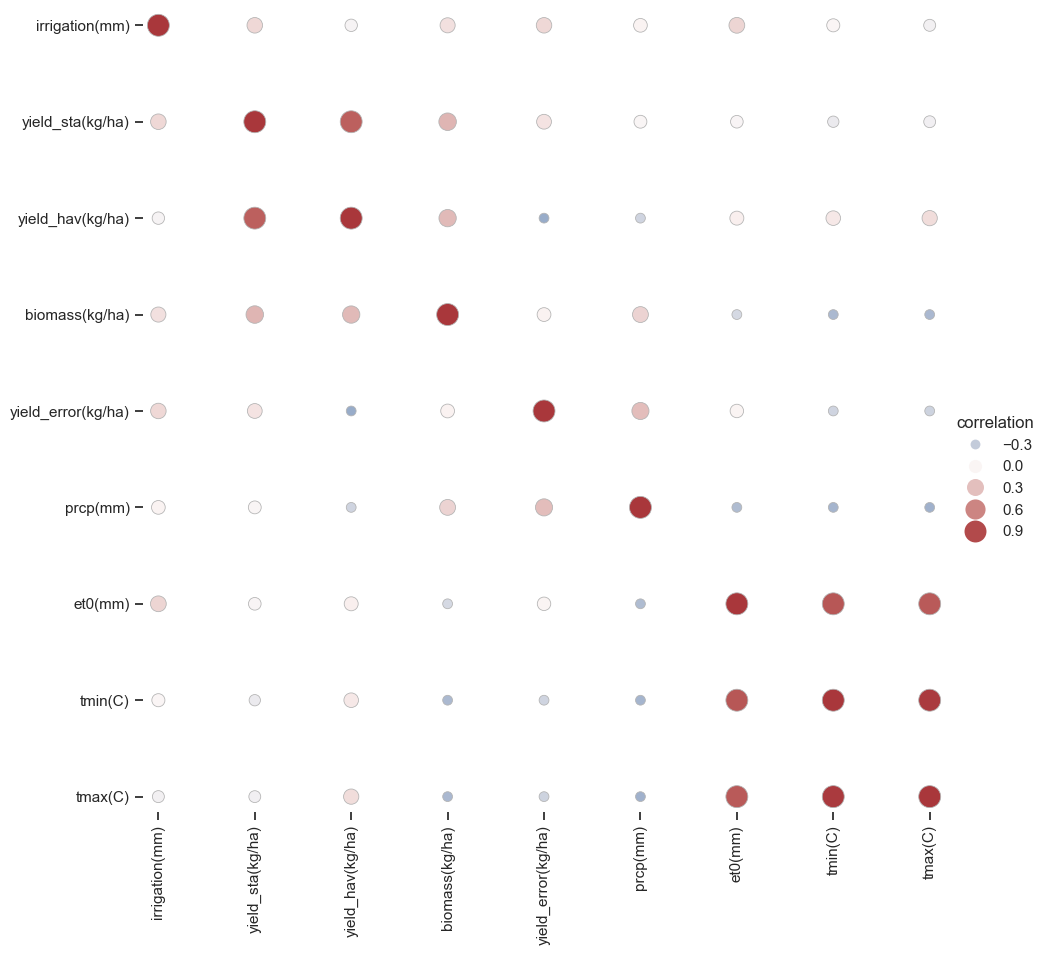

In [83]:
df = corr_yiled_weather[corr_yiled_weather.columns[3:]]
# df.head()
# # # Compute a correlation matrix and convert to long-form
corr_mat = df.corr().stack().reset_index(name="correlation")
corr_mat.head()
# # Draw each cell as a scatter point with varying size and color
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)

# Tweak the figure to finalize
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)